In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# faz figuras matplotlib aparecerem inline no notebook
# ao inves de uma nova janela

# if show_img_notebook:
%matplotlib inline
# %matplotlib notebook
# sns.set('paper', 'white', 'colorblind', font_scale=2.2, 
#         rc={'lines.linewidth': 2, 
# #             'figure.figsize': (12.0, 10.0), 
#             'image.interpolation': 'nearest', 
#             'image.cmap': 'gray',
#             'text.usetex': True})

sns.set(
    'paper', font_scale=2,
        rc={'lines.linewidth': 2,
            'text.usetex' : True,
            'image.interpolation': 'nearest',
            'image.cmap': 'gray',
            'figure.figsize': (10.0, 8.0),
            'legend.frameon': True,
            'legend.fancybox': True,
            }
       )
sns.set_style('whitegrid', {'axes.grid' : False})
sns.set_palette('colorblind', color_codes=True)

# # define valores padrões do tamanho dos plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 16

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
feature_map = torch.rand(7, 8).cpu()
print(feature_map)
print(feature_map.shape)
# feature_map = feature_map.squeeze()
plt.imshow(feature_map.numpy())
plt.show()

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_feat_map(cm, cmap=plt.cm.Blues):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.axis('off')
#     plt.colorbar()

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# def plot_bb(x1, y1, x2, y2, colors='r'):



np.set_printoptions(precision=2)

# Plot feature map
plt.figure()
plot_feat_map(feature_map, )
plt.hlines(0-1/2, 0-1/2,3-1/2, colors='r')
plot_bb(0,0,3,3)
plt.show()



## Average Precision (AP)

Here we are considering 5 objects in database anda 10 model outputs (5 being corrected detected and 5 not).

In [2]:
import numpy as np
import pandas as pd
import random
np.set_printoptions(precision=2)

random.seed(42)

In [3]:
n_objs = 5
total_detections = 10
correct_finds = 5

In [4]:
# generating labels
labels = [True, True, False, False, True, False, True, False, False, True]
confidence = [0.99, 0.95, 0.82, 0.81, 0.79, 0.78, 0.74, 0.73, 0.63, 0.62]

In [5]:
# computing precision and recall
TP = np.cumsum(labels)
prec = TP / np.arange(1, total_detections+1)
rec = TP/n_objs

In [6]:
# putting in a dataframe
data = {
    'Confidence': confidence, 
    'Correct?': labels, 
    'Precision': prec,
    'Recall': rec
    }
df = pd.DataFrame(data=data)
print(df.to_latex())

\begin{tabular}{lrlrr}
\toprule
{} &  Confidence &  Correct? &  Precision &  Recall \\
\midrule
0 &        0.99 &      True &   1.000000 &     0.2 \\
1 &        0.95 &      True &   1.000000 &     0.4 \\
2 &        0.82 &     False &   0.666667 &     0.4 \\
3 &        0.81 &     False &   0.500000 &     0.4 \\
4 &        0.79 &      True &   0.600000 &     0.6 \\
5 &        0.78 &     False &   0.500000 &     0.6 \\
6 &        0.74 &      True &   0.571429 &     0.8 \\
7 &        0.73 &     False &   0.500000 &     0.8 \\
8 &        0.63 &     False &   0.444444 &     0.8 \\
9 &        0.62 &      True &   0.500000 &     1.0 \\
\bottomrule
\end{tabular}



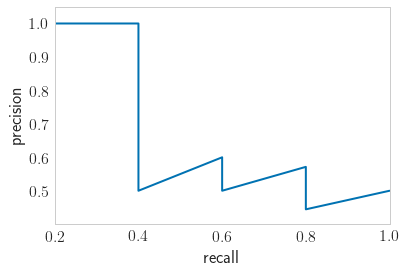

In [7]:
plt.plot(df.Recall, df.Precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.yticks(np.arange(0.5, 1.1, .1))
plt.xlim(0.2, 1.0)
plt.ylim(0.4, 1.05)
plt.savefig('precision.pdf', bbox_inches='tight')
plt.show()

In [8]:
def p_interp(p, r):
    p_flip = p[::-1]
    p_int = [p_flip[0]]
    
    for i in range(len(p)-1):        
        p_int.append(max(p_int[i], p_flip[i+1]))
    
    return p_int[::-1]    

In [9]:
p_int = p_interp(prec, rec)
df.insert(column='p_interp', value=p_int, loc=len(df.columns))

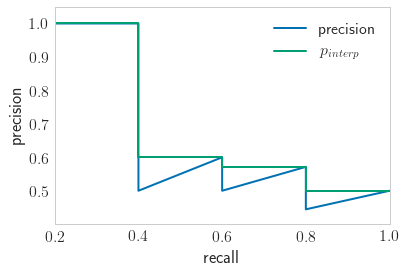

In [10]:
# plotting
plt.plot(df.Recall, df.Precision)
plt.plot(df.Recall, df.p_interp)
plt.legend(labels=['precision', '$p_{interp}$'])
plt.xlabel('recall')
plt.ylabel('precision')
plt.yticks(np.arange(0.5, 1.1, .1))
plt.xlim(0.2, 1.0)
plt.ylim(0.4, 1.05)
plt.savefig('precision_interp.pdf', bbox_inches='tight')
plt.show()